# Load Data

In [1]:
import pandas as pd 
df=pd.read_excel('/kaggle/input/online-retail-ii-xlsx/online_retail_II.xlsx')
print(df.head())
print("Original shape:",df.shape)
print("Name of columns and it's data type:")
df.info()

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
Original shape: (525461, 8)
Name of columns and it's data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype     

# Data Cleaning

In [2]:
print("\nThe missing values before cleaning:\n",df.isnull().sum())
print(" \nAfter droping missing values' rows:\n",df.dropna())
# Total duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
#Correct datatype :
print("\nData type before correction\n",df.dtypes)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Customer ID'] = df['Customer ID'].astype('Int64')  

print("\nData type after correction\n",df.dtypes)


The missing values before cleaning:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
 
After droping missing values' rows:
        Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DO

# Descriptive Statistics

In [3]:
#Make a Sales column:
df['Sales']=df['Quantity']*df['Price']
print(df['Sales'])
#Firstly calculate mean
print("Quantity mean:",df['Quantity'].mean())
print("Sales mean:",df['Sales'].mean())
#Calculate median:
print("Quantity median:",df['Quantity'].median())
print("Sales median:",df['Sales'].median())
#Calculate mode:
print("Quantity mode:",df['Quantity'].mode()[0])
print("Sales mode:",df['Sales'].mode()[0])
#Calculate standard deviation:
print("Quantity standard deviation:",df['Quantity'].std())
print("Sales  standard deviation:",df['Sales'].std())





0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
525456      5.90
525457      3.75
525458      3.75
525459      7.50
525460      3.90
Name: Sales, Length: 525461, dtype: float64
Quantity mean: 10.337667305470815
Sales mean: 18.15450553704271
Quantity median: 3.0
Sales median: 9.95
Quantity mode: 1
Sales mode: 15.0
Quantity standard deviation: 107.42411026871906
Sales  standard deviation: 160.33308342876936


# Basic Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


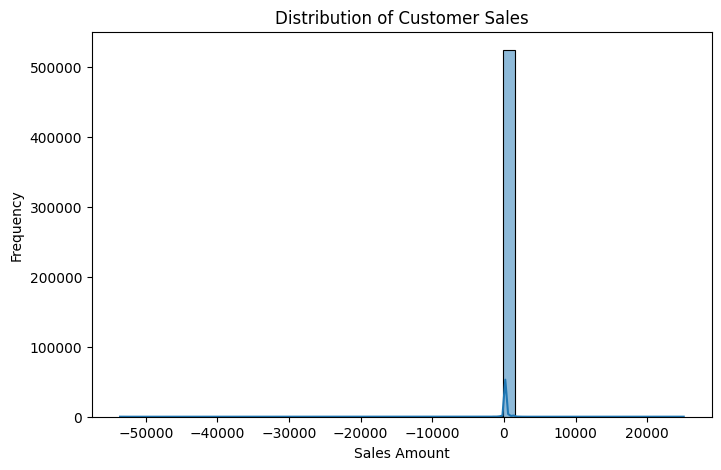

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Distribution of Customer Sales")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


# Bar chart showing sales by product category

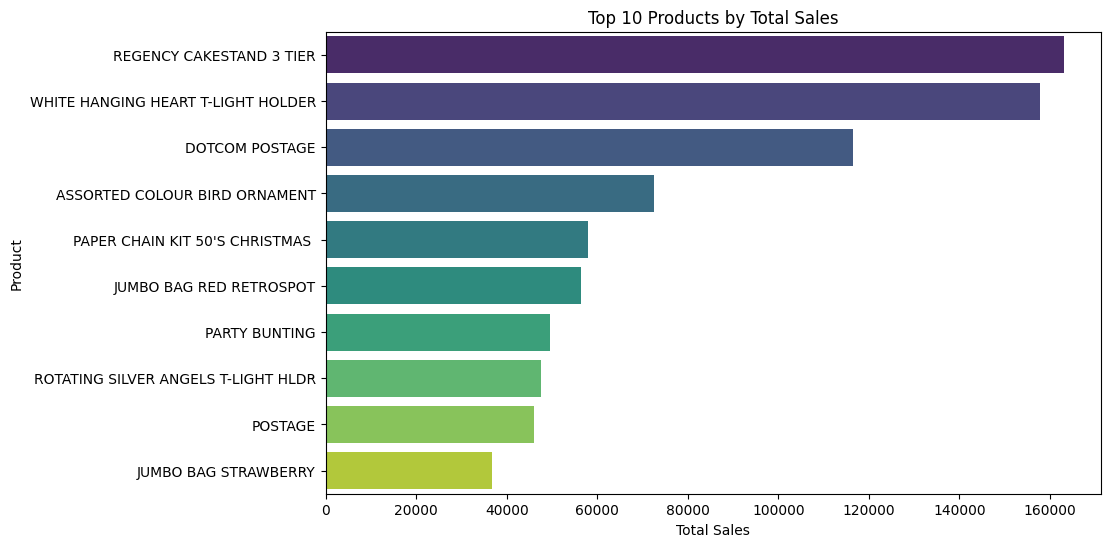

In [5]:

top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

# Group sales by date

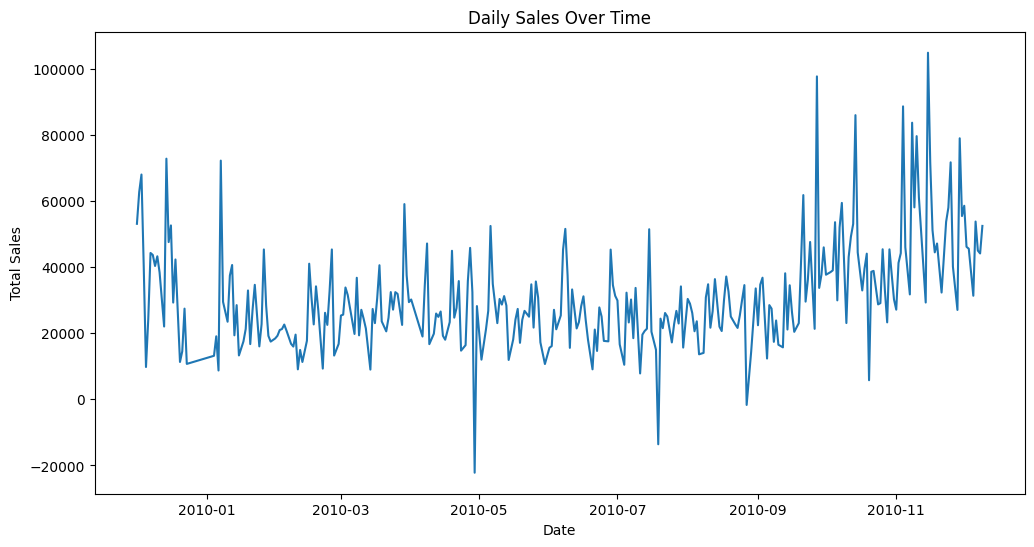

In [6]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Sales'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# A bar chart showing sales by country

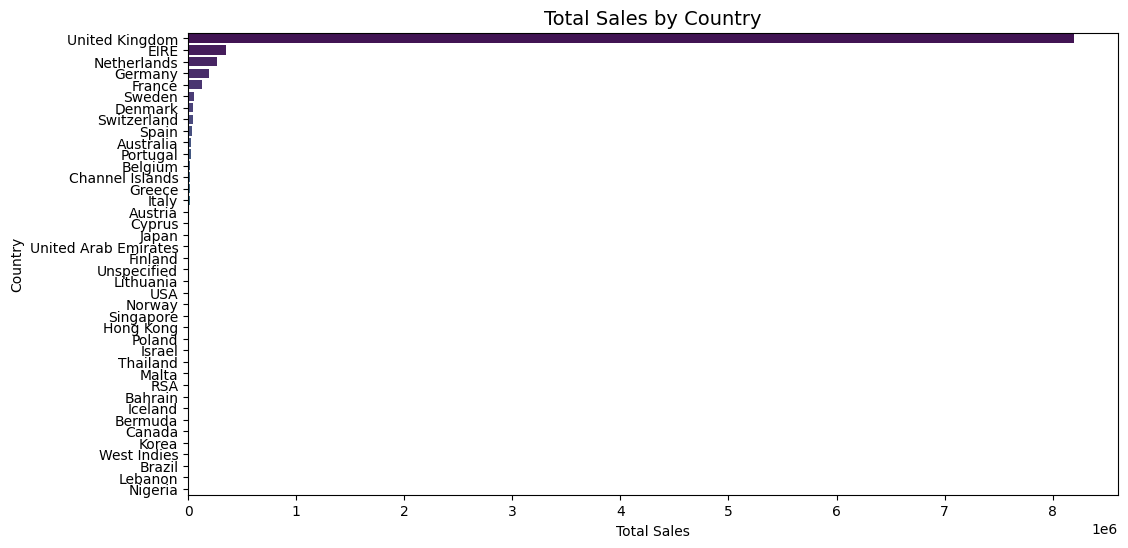

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette="viridis")

plt.title("Total Sales by Country", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

# Key Insights from Task One: Online Retail Dataset

1. **Sales Distribution**  
   - The histogram shows that most transactions are of **small sales values**, clustered close to zero.  
   - A few very high-value sales exist but are rare, making them outliers.  
   - Negative values indicate **refunds or cancellations**.  

2. **Top Products by Sales**  
   - The bar chart reveals that a few products, such as the **Regency Cakestand (3 Tier)**, generate a **large share of revenue**.  
   - This indicates that product popularity is uneven, with some items being **best sellers**.  

3. **Sales Trend Over Time**  
   - The line chart highlights that sales were **volatile throughout 2010**, with frequent ups and downs.  
   - The **most notable growth occurred in Q4 (Oct–Dec)**, likely due to seasonal demand and holiday shopping.  

4. **Sales by Country**  
   - Sales are **concentrated in a few countries**, with the **United Kingdom leading** by a wide margin.  
   - Other countries contribute smaller shares, showing that sales are not evenly distributed geographically.  

5. **Top Customers by Sales**  
   - Analysis of customer spending shows that **a small number of customers account for a significant portion of total sales**.  
   - This highlights the importance of **key customers** for revenue generation.  
